# Assignment 3 Multi-Linear Regression

Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/Bengaluru_House_Data.csv', sep=",")

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,Theanmp,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,Soiewre,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,ArsiaEx,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00


**Exercise 1: Draw a Scatter Plot for the data mentioned for given attributes.**

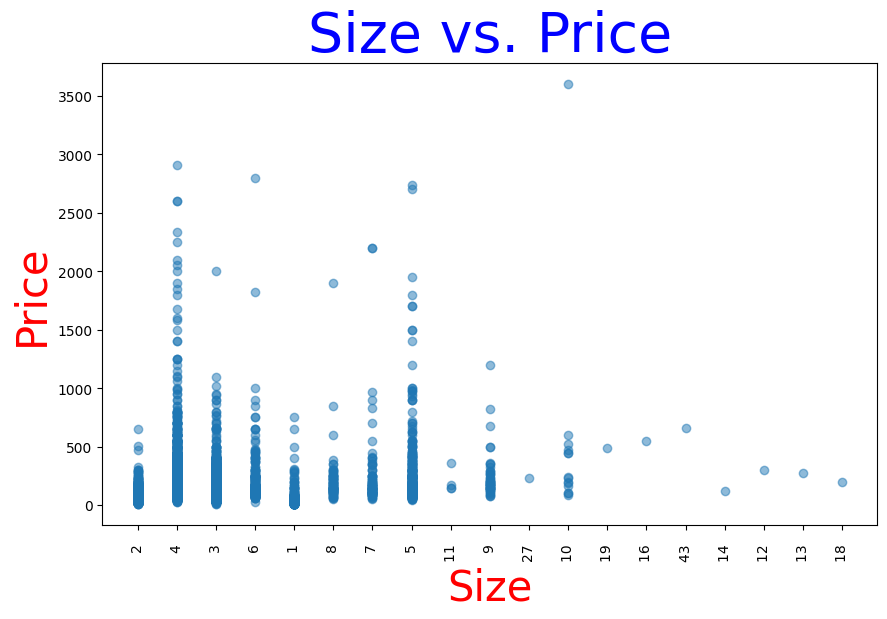

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['size'], df['price'], alpha=0.5)
plt.title('Size vs. Price',color='Blue',size=40)
plt.xlabel('Size',color='red',size=30)
plt.ylabel('Price',color='red',size=30)
plt.xticks(rotation=90)
plt.show()

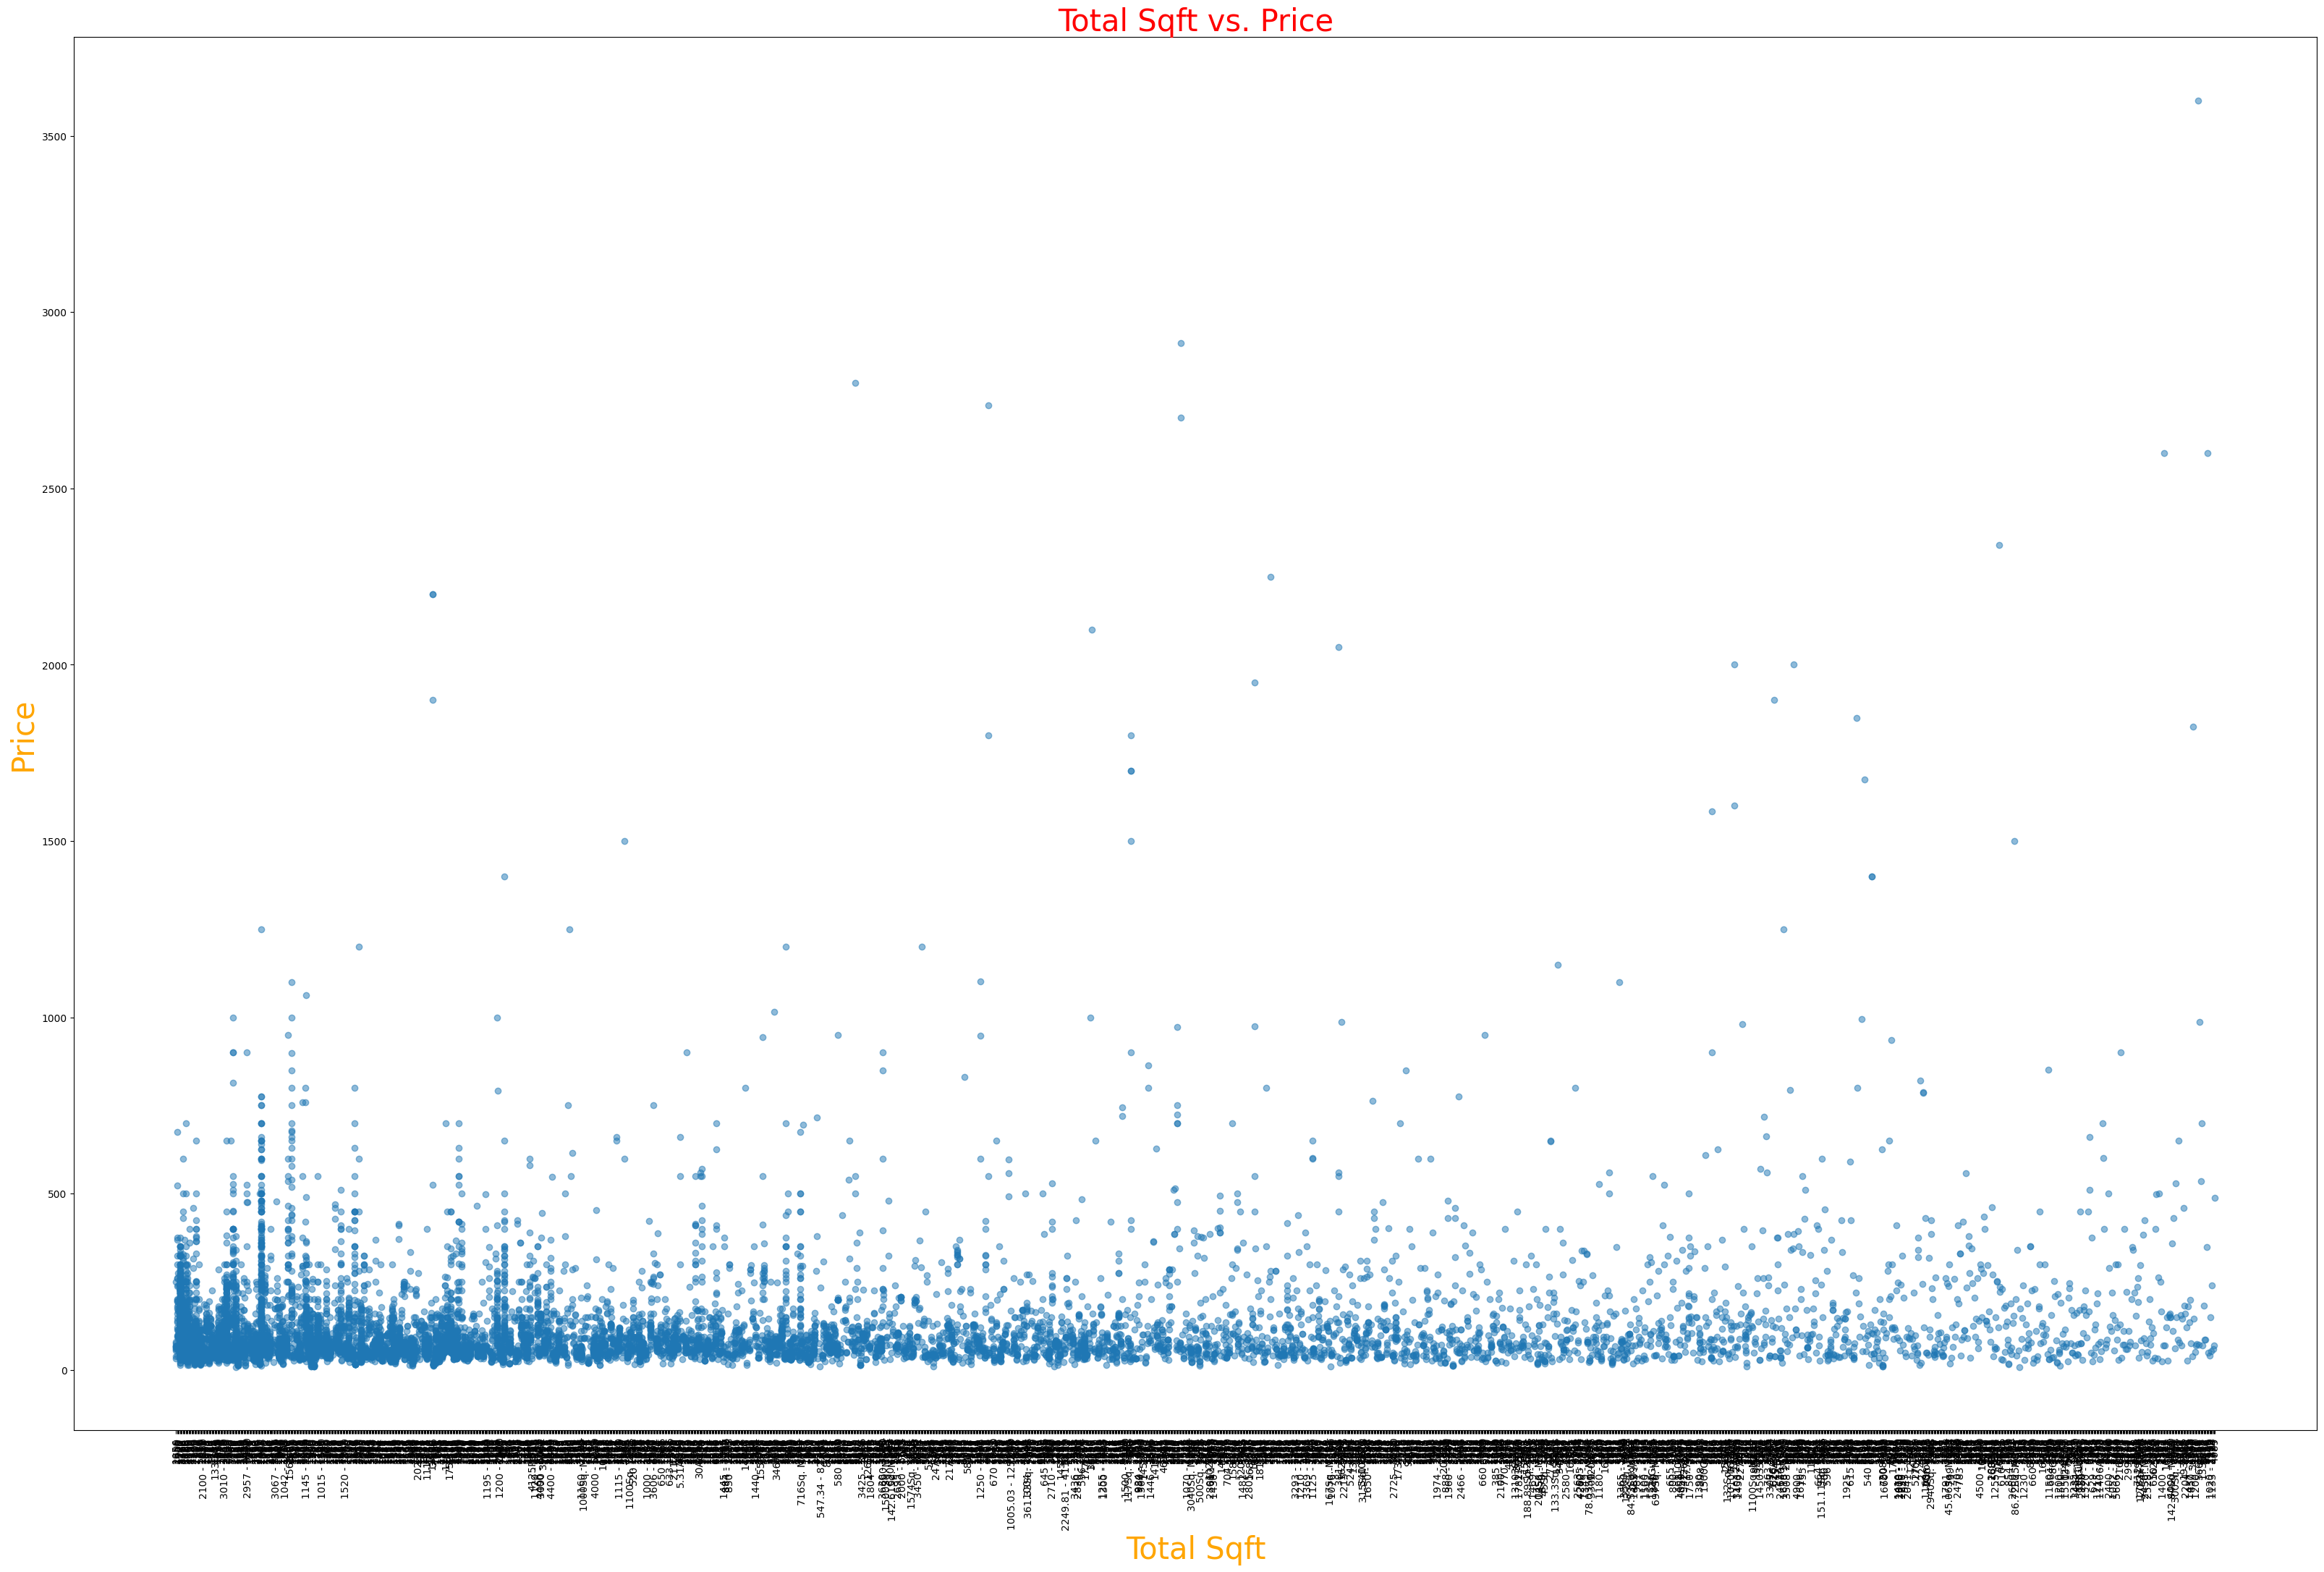

In [ ]:
plt.figure(figsize=(40, 25))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.title('Total Sqft vs. Price',color='red',size=30)
plt.xlabel('Total Sqft',color='orange',size=30)
plt.ylabel('Price',color='orange',size=30)
plt.xticks(rotation=90)
plt.show()



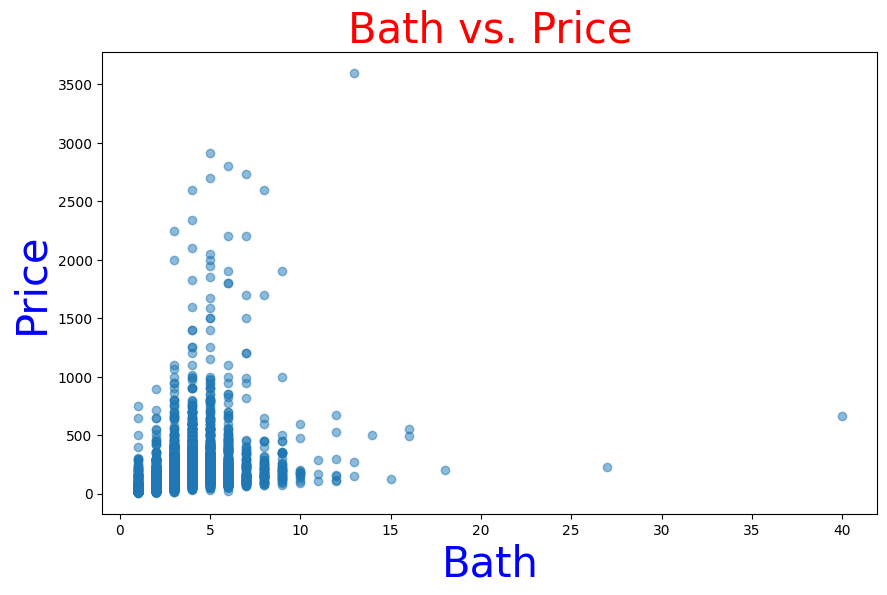

In [ ]:
from matplotlib import colors
plt.figure(figsize=(10, 6))
plt.scatter(df['bath'], df['price'], alpha=0.5)
plt.title('Bath vs. Price',color='red',size=30)
plt.xlabel('Bath',color='blue',size=30)
plt.ylabel('Price',color='blue',size=30)
plt.show()



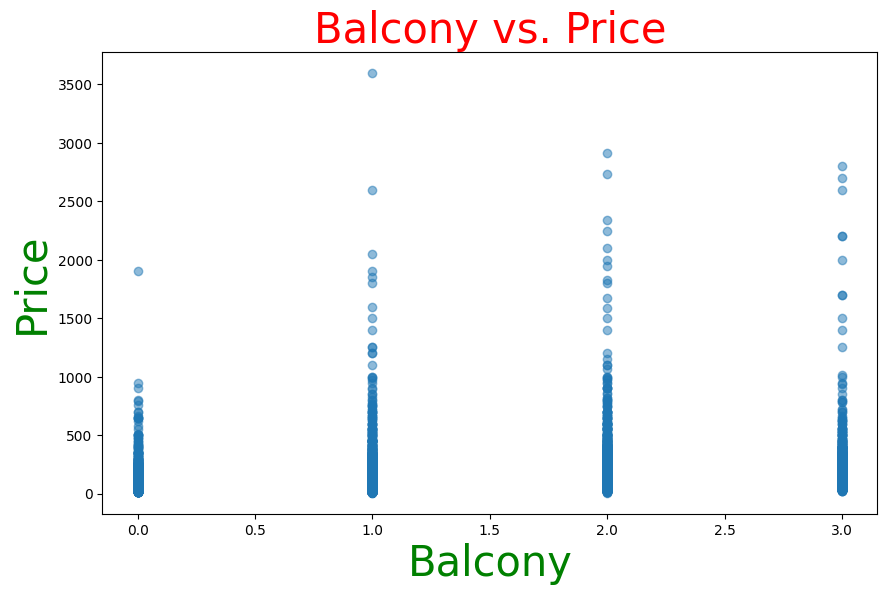

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['balcony'], df['price'], alpha=0.5)
plt.title('Balcony vs. Price',color='red',size='30')
plt.xlabel('Balcony',color='green',size='30')
plt.ylabel('Price',color='green',size='30')
plt.show()

**Exercise 2: Perform Data Pre-processing.**






In [ ]:

df=df.replace('34.46Sq. Meter', ' 34.46', regex=True)

In [ ]:
df=df.replace('RK', ' ', regex=True)

In [ ]:

df=df.replace('Bedroom', ' ', regex=True)

In [ ]:
df=df.replace('BHK', ' ', regex=True)

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,Theanmp,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,Soiewre,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,ArsiaEx,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00


In [ ]:
mean=round(df['balcony'].mean())
df['balcony'].fillna(mean)

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    0.0
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [ ]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

**Exercise 3: Performs gradient descent to learn 'theta'.(using library and without using the library). compare the values of 'theta in both cases.**

Without library (between balcony and bath)

In [ ]:
x = df[['balcony']].values
y = df['price'].values
Theta = np.zeros(x.shape[1])
Theta_0 = 0
learning_rate = 0.001
epochs = 10000
n = float(len(x))
for i in range(epochs):

    y_pred = np.dot(x, Theta) + Theta_0
    d_theta = (-2/n) * np.dot(x.T, (y - y_pred))
    d_theta_0 = (-2/n) * np.sum(y - y_pred)
    Theta = Theta - learning_rate * d_theta
    Theta_0 = Theta_0 - learning_rate * d_theta_0
print("Thetas without using a library:", Theta)
print("Intercept (Theta_0):", Theta_0)

Thetas without using a library: [19.5786662]
Intercept (Theta_0): 81.16412551301616


With library (between balcony and bath)

In [ ]:
x = df[['balcony']]
y = df['price']

model = LinearRegression()
model.fit(x, y)
theta_values = model.coef_
theta_0 = model.intercept_

print("Theta values (Coefficients):", theta_values)
print("Theta_0 (Intercept):", theta_0)

Theta values (Coefficients): [18.5027778]
Theta_0 (Intercept): 83.21260866125513


**Exercise 4: Splitting data into the training and testing, 60:40, 70:30 ND 80:20.**

In [ ]:
X = df[['size', 'bath', 'balcony']]
y = df['price']

60:40 split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4, random_state=1)

70:30 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

80:20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Exercise 5: Train Multilinear regression model and test USING gradient descent and using the library. Compare your results with simple linear regression**

Without Library

In [ ]:
x = df[['size', 'bath', 'balcony']].values.astype(float)
y = df['price'].values.astype(float)
Theta = np.zeros(x.shape[1])
Theta_0 = 0
learning_rate = 0.001
epochs = 10000
n = float(len(x))
for i in range(epochs):

    y_pred = np.dot(x, Theta) + Theta_0


    d_theta = (-2/n) * np.dot(x.T, (y - y_pred))
    d_theta_0 = (-2/n) * np.sum(y - y_pred)


    Theta = Theta - learning_rate * d_theta
    Theta_0 = Theta_0 - learning_rate * d_theta_0


print("Thetas without using a library:", Theta)
print("Intercept (Theta_0):", Theta_0)

Thetas without using a library: [-5.2218281  54.24324581  3.12300372]
Intercept (Theta_0): -23.505791267653045


With Library

In [ ]:
x = df[['size', 'bath', 'balcony']]
y = df['price']

model = LinearRegression()
model.fit(x, y)
theta_values = model.coef_
theta_0 = model.intercept_

print("Theta values (Coefficients):", theta_values)
print("Theta_0 (Intercept):", theta_0)

Theta values (Coefficients): [-5.45159577 54.82404293  3.71725482]
Theta_0 (Intercept): -25.619520234833004


The Value of Thetas for without library and with library are very close to each other , the without library falling short by a few numbers at 10000 epochs and 0.001 learning rate

**Exercise 6:Did you expect ridge regression to outperform the lasso ,or vice versa ?**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df[['size', 'bath', 'balcony']]
y = df['price']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

Lasso

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
l_mse = mean_squared_error(y_test, lasso_pred)
l_r2 = r2_score(y_test, lasso_pred)

In [ ]:
print("Mean Square Error:", l_mse)
print("R-2 :", l_r2)

Mean Square Error: 13704.65038189116
R-2 : 0.24310629865995825


Ridge

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
r_mse = mean_squared_error(y_test, ridge_pred)
r_r2 = r2_score(y_test, ridge_pred)

In [ ]:
print("Mean Square Error:", r_mse)
print("R-2:", r_r2)

Mean Square Error: 13728.708674618476
R-2: 0.24177758397385707


Expected Ridge to perform better due to regularization factor/ bias being squared allowing for faster regularization

**Exercise 7: Which predictors turned out to be important in the final models(s)?**

By comparing the theta values of each predictor, it is evident that BATH is the most significant predictor in this multilinear regression, followed by BALCONY and SIZE. Since BATH has a value of 54, it is the most significant predictor.